In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import rotate
from scipy.optimize import curve_fit



In [3]:
def import_tif_image(filepath):
    image = Image.open(filepath)
    image = image.convert('L')
    array = np.array(image)
    return array

def get_max_index(array):
    flattened_array = array.flatten()
    max_index = np.argmax(flattened_array)
    max_row = max_index // array.shape[1]
    max_col = max_index % array.shape[1]
    return (max_row, max_col)

def gaussian_function(x, amplitude, mean, std_dev, c):
    return amplitude * np.exp(-(x - mean)**2 / (2* std_dev**2)) + c




In [4]:
tif_filepath = 'LSC_nopinhole_40ms_100_1_MMStack_Pos0.ome.tif'
intensity_array = import_tif_image(tif_filepath)

rotated_array = rotate(intensity_array, 2.5)



In [5]:
max_index = get_max_index(rotated_array)
print(max_index)

xslice = rotated_array[max_index[0], :]
yslice = rotated_array[500:700, max_index[1]]
yslice


(601, 745)


array([ 0,  0,  0,  0,  0,  0,  1,  4,  1,  3,  0,  0,  0,  1,  2,  1,  2,
        3,  3,  3,  4,  1,  2,  3,  0,  2,  4,  2,  2,  2,  4,  1,  1,  1,
        0,  1,  1,  3,  3,  3,  0,  0,  1,  1,  1,  4,  0,  1,  2,  0,  2,
        0,  0,  2,  3,  1,  3,  1,  3,  4,  2,  2,  3,  2,  2,  3,  1,  2,
        1,  1,  1,  5,  1,  6,  4,  4,  4,  5,  3,  5,  6,  3,  8,  9, 10,
        8, 12, 15, 12, 16, 18, 17, 20, 22, 29, 40, 46, 55, 72, 80, 84, 95,
       89, 73, 60, 44, 34, 28, 20, 17, 14, 14, 11, 12, 10,  7,  4,  5,  3,
        4,  2,  3,  3,  6,  4,  5,  4,  2,  1,  6,  1,  3,  3,  3,  2,  2,
        1,  2,  0,  0,  1,  3,  0,  3,  1,  2,  2,  3,  4,  0,  2,  2,  1,
        2,  3,  1,  2,  6,  0,  2,  2,  2,  0,  0,  3,  4,  4,  2,  1,  0,
        2,  2,  2,  0,  1,  2,  2,  2,  0,  1,  3,  0,  3,  0,  0,  0,  0,
        2,  0,  2,  0,  4,  1,  2,  0,  1,  0,  0,  2,  2], dtype=uint8)

In [6]:
initial_guess_x = [80, max_index[0], 50,6]
params_x, params_covariance_x = curve_fit(gaussian_function, range(len(xslice)), xslice, p0=initial_guess_x)
print(params_x)

initial_guess_y = [80, 100, 30, 0]
params_y, params_covariance_y = curve_fit(gaussian_function, range(len(yslice)), yslice, p0=initial_guess_y)
print(params_y)
params_covariance_y


[ 69.02845774 745.59085132  77.27594576  11.02858271]
[ 82.42468416 100.48161829   4.42942858   2.53922212]


array([[ 1.77458734e+00,  2.08652958e-08, -5.98585883e-02,
        -3.66773365e-02],
       [ 2.08652958e-08,  6.73292465e-03, -1.10353471e-09,
        -8.48028755e-11],
       [-5.98585883e-02, -1.10353471e-09,  7.03249884e-03,
        -3.94192691e-03],
       [-3.66773365e-02, -8.48028755e-11, -3.94192691e-03,
         5.18695889e-02]])

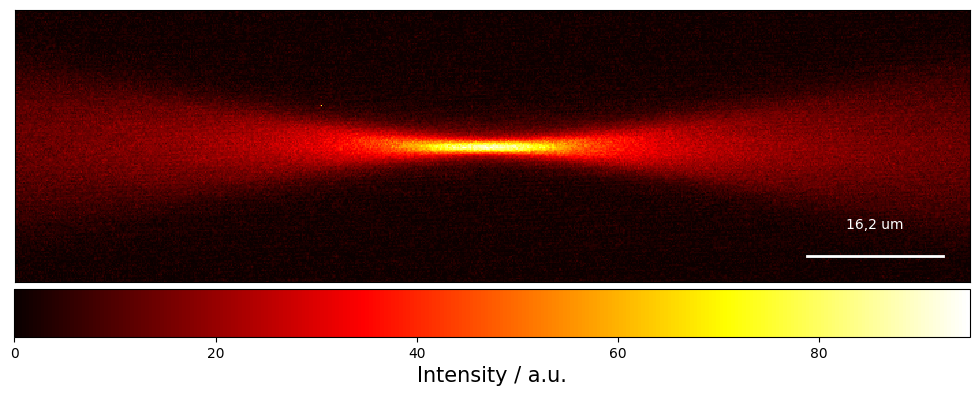

In [7]:
bildausschnitt = rotated_array[500:700, 400:1100]


plt.figure(figsize=(10,4))
plt.imshow(bildausschnitt, cmap='hot', interpolation='nearest')
cbar = plt.colorbar(location='bottom', shrink=.985, pad=0.02)
cbar.set_label(label='Intensity / a.u.',size = 15)


scale_bar_length = 100
scale_bar_units = 'pixels'
scale_bar_x = bildausschnitt.shape[1] -120
scale_bar_y = bildausschnitt.shape[0] -20
plt.plot([scale_bar_x, scale_bar_x + scale_bar_length], [scale_bar_y, scale_bar_y], color='white', linewidth=2)
plt.text(scale_bar_x + scale_bar_length / 2, scale_bar_y - 20, f'16,2 um', ha='center', color='white')


plt.xticks([])
plt.yticks([])


plt.tight_layout()
# plt.savefig('LSNiPinhole.pdf', dpi = 300)

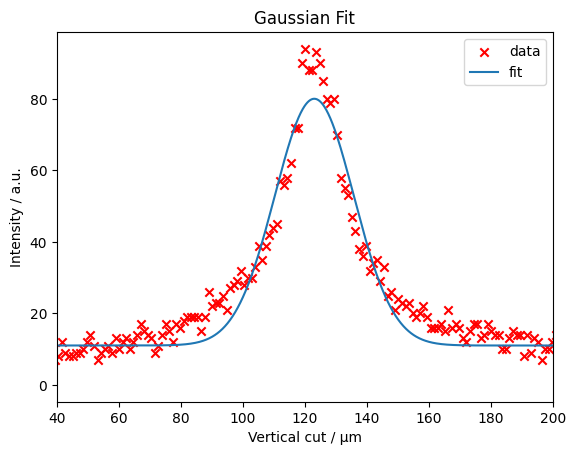

In [8]:
xfit = np.array(range(len(xslice)))*0.165
plt.scatter(xfit[::7], xslice[::7], marker = 'x', color = 'r', label = 'data')
plt.plot(xfit, gaussian_function(xfit,params_x[0],params_x[1]*0.165,params_x[2]*0.165,params_x[3] ),label = 'fit')

plt.xlim(40, 200)


plt.legend()
plt.xlabel('Vertical cut / μm')
plt.ylabel('Intensity / a.u.')
plt.title('Gaussian Fit')
plt.show()


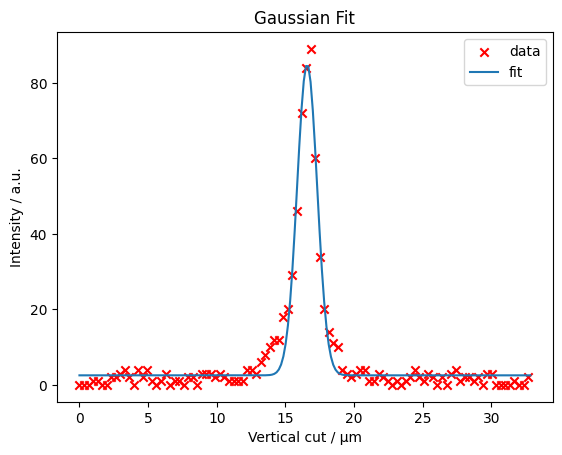

In [9]:
yfit = np.array(range(len(yslice)))*0.165
plt.scatter(yfit[::2], yslice[::2], marker = 'x', color = 'r', label = 'data')
plt.plot(yfit, gaussian_function(yfit,params_y[0],params_y[1]*0.165,params_y[2]*0.165,params_y[3] ),label = 'fit')

# plt.xlim(40, 200)


plt.legend()
plt.xlabel('Vertical cut / μm')
plt.ylabel('Intensity / a.u.')
plt.title('Gaussian Fit')
plt.show()